In [ ]:
#가상의 데이터를 만들기 위해 넘파이를 활용
import numpy as np

#사이킷 런의 '나이브 베이즈'에서 '가우시안 나이브 베이즈' 임포트
from sklearn.naive_bayes import GaussianNB

#데이터의 시각화를 위해 맷플롯립 임포트
import matplotlib.pyplot as plt

# 1. 나이브 베이즈

In [ ]:
#가상의 데이터를 만듦
#특징, feature, 독립변수 -> X(데이터)
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

#label, 레이블, 종속변수 -> Y(값)
Y = np.array([1, 1, 1, 2, 2, 2])

In [ ]:
#머신러닝 알고리즘 정의(이름붙임)
#가우시안 나이브 베이즈 분류기를 정의함
clf = GaussianNB()

#훈련 -> 지도학습(데이터, 라벨)
clf.fit(X, Y)

GaussianNB()

In [ ]:
#테스트! -> X값
print( clf.predict([[-0.8, -2]]) )

[1]


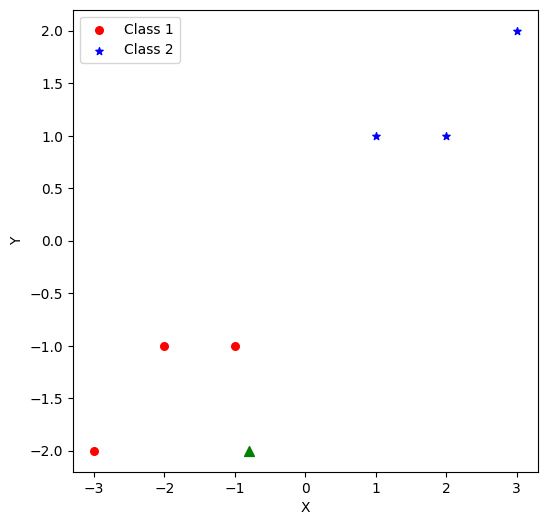

In [ ]:
plt.figure(figsize=(6,6))

#마커와 색상으로 클래스를 구분할 수 있도록 합니다.
markers = ['o', '*']
colors = ['red', 'blue']

#0-1, 1-2
for i, cls in enumerate(np.unique(Y)):
  #X의 첫번째 데이터 -> [-1, -1] , Y의 첫번째 -> 1
  pts = [(x, y) for (x, y), label in zip(X, Y) if label == cls]
  xs, ys = zip(*pts)

  plt.scatter(
      xs, ys,
      c = colors[i],
      marker = markers[i],
      label = f'Class {i+1}',
      s=30
  )

plt.scatter(-0.8, -2, c='green', marker='^', s=50)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 서포트 벡터 머신

In [ ]:
#SV -> 분류(Classifier), 회귀(Regression)
#SVR
from sklearn.svm import LinearSVC

#정의
svm_clf = LinearSVC()

#훈련
svm_clf.fit(X, Y)

#예측
svm_clf.predict([[-0.8, -2]])

array([1])

# K-최근접 이웃 알고리즘

In [ ]:
#라이브러리 임포트
from sklearn.neighbors import KNeighborsClassifier

# 정의
#몇 개의 이웃을 참고할 것인가?
#하이퍼파라미터 -> ? 1.경험적 / 2.Search 알고리즘(최적의 하이퍼파라미터를 찾아주는)
#Grid search, random search
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 훈련
knn_clf.fit(X,Y)

# 예측
print(knn_clf.predict([[-0.8,-2]]))

[1]


# 결정 트리

In [ ]:
#https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier

#정의
tree_clf = DecisionTreeClassifier()

#훈련
tree_clf.fit(X, Y)

#예측
tree_clf.predict([[-0.8, -1]])

array([1])

#데이터 마운트

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

In [ ]:
data_path = '/content/drive/MyDrive/2505_천안시_초급/데이터/iris.csv'

In [ ]:
import pandas as pd

data = pd.read_csv(data_path)

In [ ]:
#데이터를 위에서 5줄 출력
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#열의 이름을 출력
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
#데이터 준비!
#X = data[[x for x in data.columns if x != 'variety']] -> 리스트 컴프리헨션 방식
X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
Y = data['variety']

In [ ]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [ ]:
#중복없는 값을 출력하여 확인한다
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
#인코딩
#replace({키:값}) : 키를 값으로 대체한다~
Y = data['variety'].replace({'Setosa':0, 'Versicolor':1, 'Virginica':2}, inplace = True)
Y = data['variety']

In [ ]:
Y.head()

,variety
0,0
1,0
2,0
3,0
4,0


In [ ]:
#X의 데이터 길이 == Y의 데이터 길이
len(X) == len(Y)

True

In [ ]:
#모델 임포트
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#-------- 아래쪽 코드 채우기 (~25분)----
#정의
#() -> 세팅이 되어 있는 기초 옵션이 적용됨
nb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=3) #주변의 k개의 '이웃'을 보고, 나의 소속을 짐작
dt = DecisionTreeClassifier()

#훈련
nb.fit(X, Y)
svc.fit(X, Y)
knn.fit(X, Y)
dt.fit(X, Y)

#예측
#가상데이터 -> [[5.9,	2.0,	5.1,	1.8]]
print( nb.predict([[5.9,	2.0,	5.1,	1.8]]) )
print( svc.predict([[5.9,	2.0,	5.1,	1.8]]) )
print( knn.predict([[5.9,	2.0,	5.1,	1.8]]) )
print( dt.predict([[5.9,	2.0,	5.1,	1.8]]) )

[2]
[2]
[2]
[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#임포트!
from sklearn.linear_model import LogisticRegression

lR = LogisticRegression()
lR.fit(X, Y)
lR.predict([[5.9,	2.0,	5.1,	1.8]])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])